In [9]:
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import np_utils

In [10]:
#Эллипс,повернутый на 45 градусов по часовой стрелке.Решил сделать его поуже,поэтому точек в обучающей выборке 
#и на графике лучше сделать побольше.
np.random.seed(3)
X = np.random.random((400, 2)) * 4.0 - 2.0

Y = [
    1 if ( - y / np.sqrt(2) + x / np.sqrt(2))**2 / 1.9 + (y / np.sqrt(2) + x / np.sqrt(2))**2 / 0.2 <= 1 else 0
    for [x, y] in X
]

In [11]:
l0 = Input(shape=(2,))
l1 = Dense(10, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(8, activation='sigmoid', use_bias=True)(l1)
l3 = Dense(6, activation='sigmoid', use_bias=True)(l2)
l4 = Dense(1, activation='sigmoid', use_bias=False)(l3)

model = Model(input=l0, output=l4)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

/home/pup/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [12]:
if os.path.isfile("Seed"):
    model.load_weights("Seed")
else:
    model.fit(
        X, Y,
        epochs=40000,
        verbose=False
    )

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.r_[-2:2:0.05]

XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green')

plt.show()

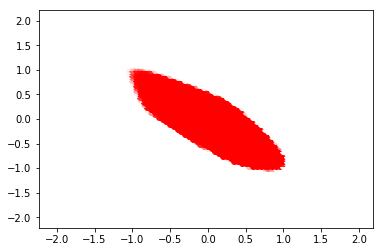

In [8]:

def saturate(v):
    return min(1, max(0, v))

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()

In [6]:
 model.save("Seed")